In [1]:
options(jupyter.plot_mimetypes = 'image/png')
#options(repr.plot.width=6, repr.plot.height=3)

# The good, the bad, the ugly

* Good visualization: Clearly and accurately convey the key message in the data
* Bad visualization: Obfuscate the data (either through ignorance, or malice!)

What does this mean?
* Visualizations can be used by an analyst
for their own consumption to gain insights into the data.
* Visualizations can also be used to provide information
to a decision maker and/or to convince someone of something.
* A bad visualization can hide
patterns that could give insight or mislead decision makers.

This is a **bad** example:
![](pics/bad_example.png)

In [2]:
intl = read.csv('data/intl.csv')

https://d37djvu3ytnwxt.cloudfront.net/asset-v1:MITx+15.071x_3+1T2016+type@asset+block/intl.csv

In [3]:
library(ggplot2)

Warning message:
: package ‘ggplot2’ was built under R version 3.2.4

In [4]:
str(intl)

'data.frame':	8 obs. of  2 variables:
 $ Region       : Factor w/ 8 levels "Africa","Asia",..: 2 3 6 4 5 1 7 8
 $ PercentOfIntl: num  0.531 0.201 0.098 0.09 0.054 0.02 0.015 0.002


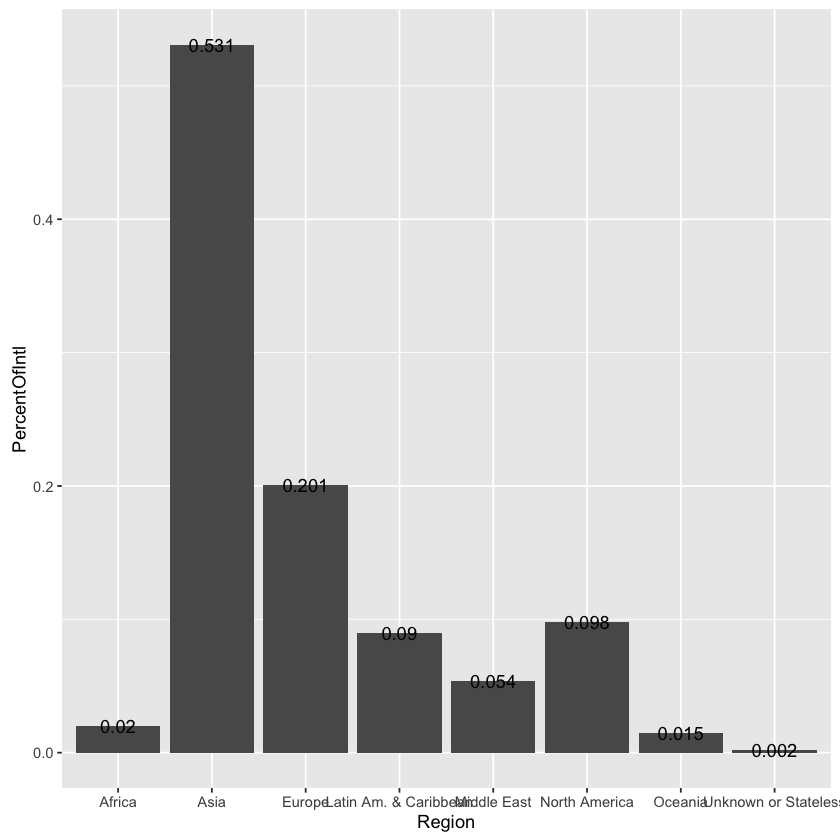

In [5]:
ggplot(intl, aes(x=Region, y=PercentOfIntl)) + 
    geom_bar(stat="identity") + # use value of y as it is
    geom_text(aes(label=PercentOfIntl)) # label the bar

Make the x in the right order:

In [6]:
intl = transform(intl, Region = reorder(Region, -PercentOfIntl))

In [7]:
str(intl) # Region order correct, "-PercentOfIntl" means decreasing order

'data.frame':	8 obs. of  2 variables:
 $ Region       : Factor w/ 8 levels "Asia","Europe",..: 1 2 3 4 5 6 7 8
  ..- attr(*, "scores")= num [1:8(1d)] -0.02 -0.531 -0.201 -0.09 -0.054 -0.098 -0.015 -0.002
  .. ..- attr(*, "dimnames")=List of 1
  .. .. ..$ : chr  "Africa" "Asia" "Europe" "Latin Am. & Caribbean" ...
 $ PercentOfIntl: num  0.531 0.201 0.098 0.09 0.054 0.02 0.015 0.002


In [8]:
intl$PercentOfIntl = intl$PercentOfIntl * 100

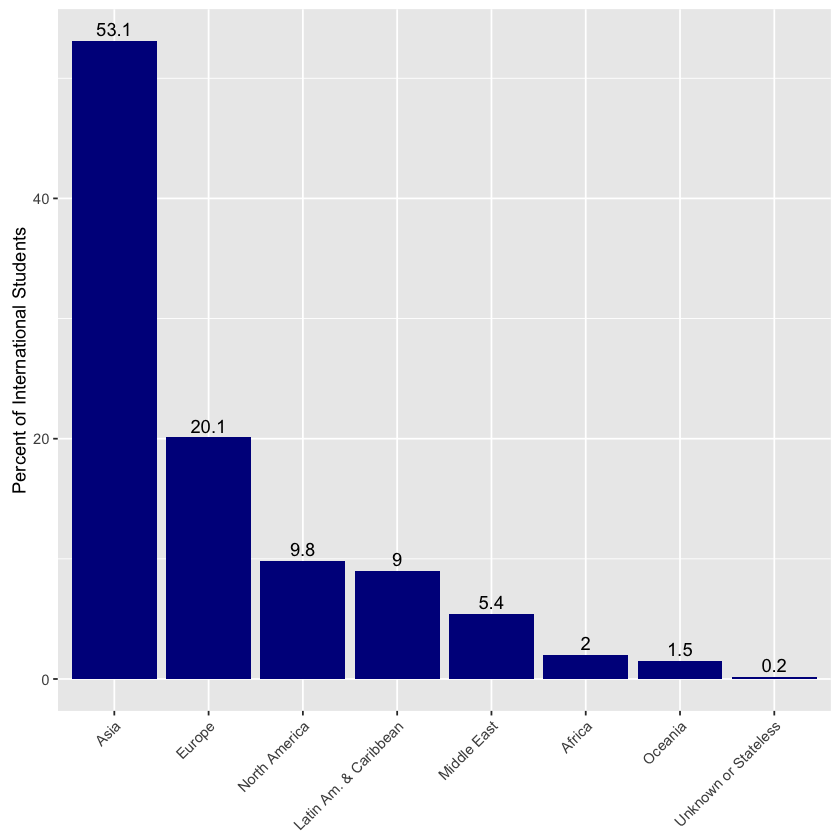

In [9]:
ggplot(intl, aes(x=Region, y=PercentOfIntl)) + 
    geom_bar(stat="identity",
             fill="dark blue") + # use value of y as it is
    geom_text(aes(label=PercentOfIntl),
              vjust=-0.4) + # label the bar and move it up a bit
    ylab("Percent of International Students") + 
    theme(axis.title.x = element_blank(),
          axis.text.x = element_text(angle=45, hjust=1))

# Student data all over the world
https://d37djvu3ytnwxt.cloudfront.net/asset-v1:MITx+15.071x_3+1T2016+type@asset+block/intlall.csv

In [10]:
library(ggmap)

In [11]:
intlall = read.csv("data/intlall.csv",
                   stringsAsFactors=FALSE)

In [12]:
str(intlall)

'data.frame':	114 obs. of  7 variables:
 $ Citizenship    : chr  "Albania" "Antigua and Barbuda" "Argentina" "Armenia" ...
 $ UG             : int  3 NA NA 3 6 NA 2 3 1 1 ...
 $ G              : int  1 NA 19 2 32 11 NA 7 NA 8 ...
 $ SpecialUG      : int  0 NA NA NA NA NA NA NA NA NA ...
 $ SpecialG       : int  0 1 NA NA NA NA NA NA NA NA ...
 $ ExhangeVisiting: int  0 NA NA NA 1 5 NA NA NA 7 ...
 $ Total          : int  4 1 19 5 39 16 2 10 1 16 ...


In [13]:
intlall[is.na(intlall)] = 0

In [14]:
str(intlall)

'data.frame':	114 obs. of  7 variables:
 $ Citizenship    : chr  "Albania" "Antigua and Barbuda" "Argentina" "Armenia" ...
 $ UG             : num  3 0 0 3 6 0 2 3 1 1 ...
 $ G              : num  1 0 19 2 32 11 0 7 0 8 ...
 $ SpecialUG      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ SpecialG       : num  0 1 0 0 0 0 0 0 0 0 ...
 $ ExhangeVisiting: num  0 0 0 0 1 5 0 0 0 7 ...
 $ Total          : int  4 1 19 5 39 16 2 10 1 16 ...


In [15]:
world_map = map_data("world")
str(world_map)


 # maps v3.1: updated 'world': all lakes moved to separate new #
 # 'lakes' database. Type '?world' or 'news(package="maps")'.  #




'data.frame':	99338 obs. of  6 variables:
 $ long     : num  -69.9 -69.9 -69.9 -70 -70.1 ...
 $ lat      : num  12.5 12.4 12.4 12.5 12.5 ...
 $ group    : num  1 1 1 1 1 1 1 1 1 1 ...
 $ order    : int  1 2 3 4 5 6 7 8 9 10 ...
 $ region   : chr  "Aruba" "Aruba" "Aruba" "Aruba" ...
 $ subregion: chr  NA NA NA NA ...


In [16]:
world_map = merge(world_map, intlall, by.x="region", by.y="Citizenship")

In [17]:
str(world_map)

'data.frame':	63634 obs. of  12 variables:
 $ region         : chr  "Albania" "Albania" "Albania" "Albania" ...
 $ long           : num  20.5 20.4 19.5 20.5 20.4 ...
 $ lat            : num  41.3 39.8 42.5 40.1 41.5 ...
 $ group          : num  6 6 6 6 6 6 6 6 6 6 ...
 $ order          : int  789 822 870 815 786 821 818 779 879 795 ...
 $ subregion      : chr  NA NA NA NA ...
 $ UG             : num  3 3 3 3 3 3 3 3 3 3 ...
 $ G              : num  1 1 1 1 1 1 1 1 1 1 ...
 $ SpecialUG      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ SpecialG       : num  0 0 0 0 0 0 0 0 0 0 ...
 $ ExhangeVisiting: num  0 0 0 0 0 0 0 0 0 0 ...
 $ Total          : int  4 4 4 4 4 4 4 4 4 4 ...


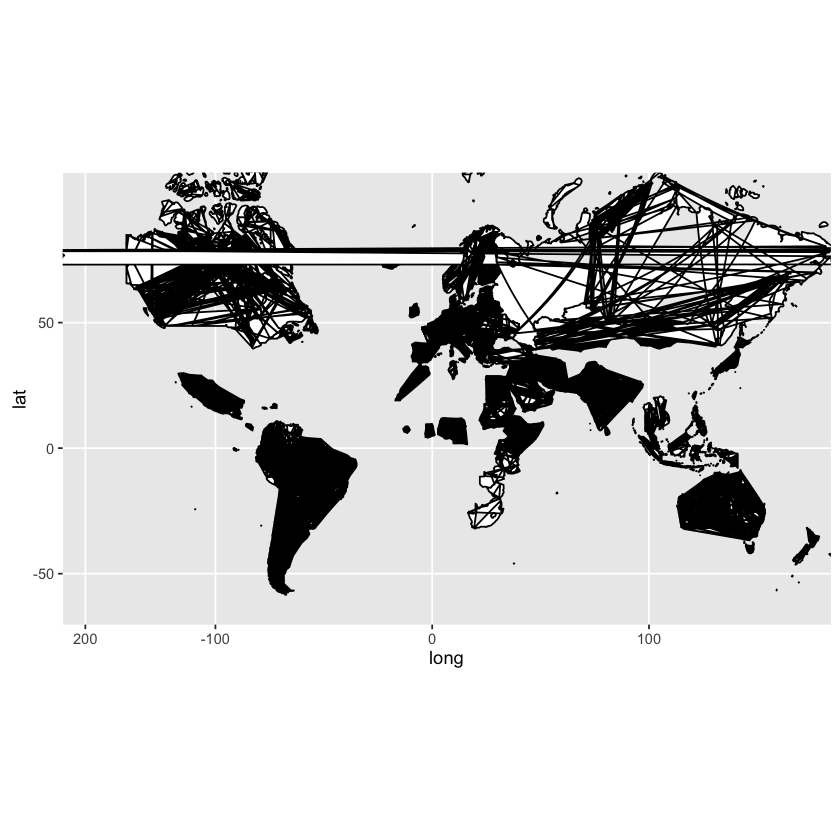

In [18]:
ggplot(world_map, aes(x=long, y=lat, group=group)) + 
    geom_polygon(fill="white", color="black") + 
    coord_map("mercator")

Well, sometimes the merge can reorder the data.
And it turns out that what the world_map data frame really is
is actually a list of latitude and longitude points
that define the border of each country.
So if we accidentally reorder the data frame
they no longer make any sense.
And as it goes from point to point,the points might be on the other side of the country
as it defines the polygon.


So, we have to reorder the data in the correct order.
So this command is a little bit complicated looking,
but when you break it down, it's not so bad.


In [19]:
world_map = world_map[order(world_map$group, world_map$order), ]

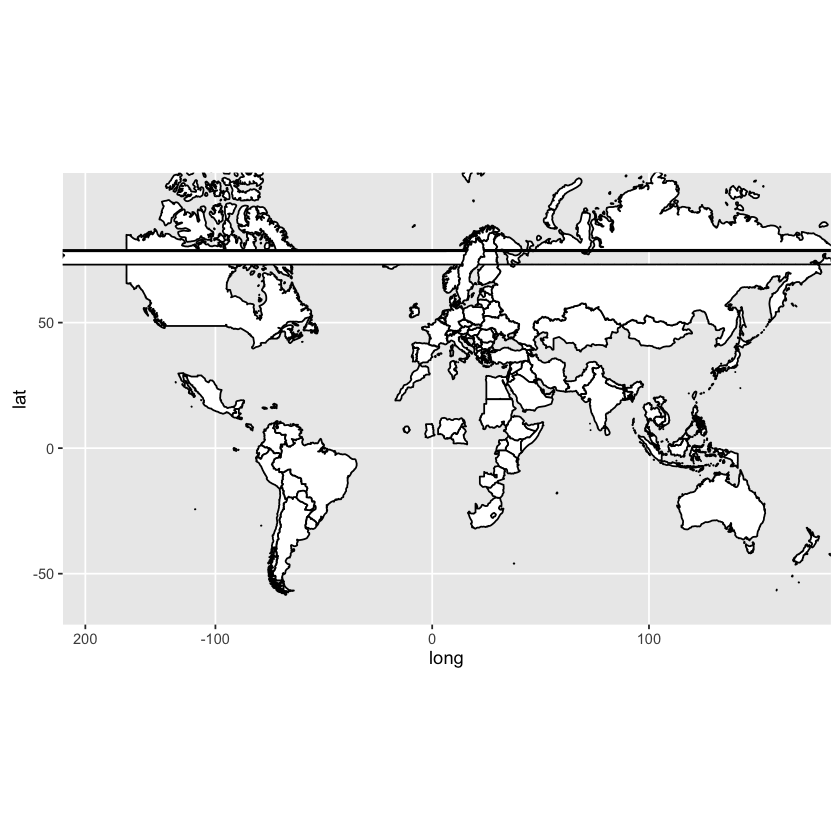

In [20]:
ggplot(world_map, aes(x=long, y=lat, group=group)) + 
    geom_polygon(fill="white", color="black") + 
    coord_map("mercator")

In [21]:
intlall$Citizenship[intlall$Citizenship=="China (People's Republic Of)"] = "China"

In [22]:
sum(intlall$Citizenship=="China")

[1] 1

In [23]:
world_map = merge(map_data("world"),
                  intlall, 
                  by.x="region", 
                  by.y="Citizenship")
world_map = world_map[order(world_map$group, world_map$order), ]

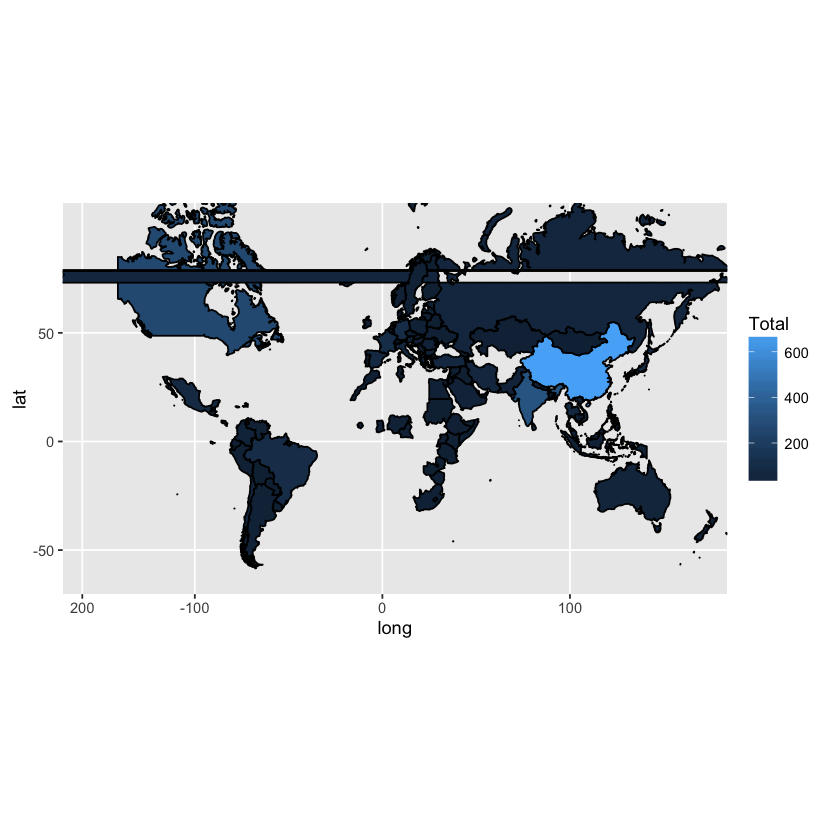

In [24]:
ggplot(world_map, aes(x=long, y=lat, group=group)) + 
    geom_polygon(aes(fill=Total), color="black") + 
    coord_map("mercator")

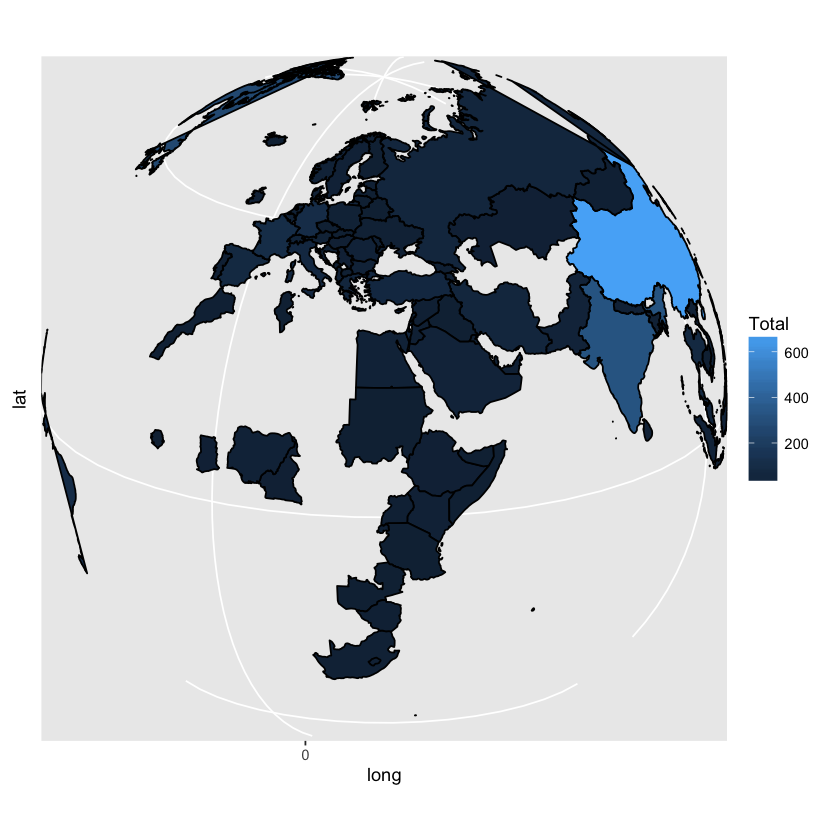

In [25]:
ggplot(world_map, aes(x=long, y=lat, group=group)) + 
    geom_polygon(aes(fill=Total), color="black") + 
    coord_map("ortho", orientation=c(20,30,0))

In [ ]:
ggplot(world_map, aes(x=long, y=lat, group=group)) + 
    geom_polygon(aes(fill=Total), color="black") + 
    coord_map("ortho", orientation=c(-37,30,0))

# About Scales:
https://d37djvu3ytnwxt.cloudfront.net/asset-v1:MITx+15.071x_3+1T2016+type@asset+block/households.csv

In [27]:
households = read.csv('data/households.csv')
str(households)

'data.frame':	8 obs. of  7 variables:
 $ Year          : int  1970 1980 1990 1995 2000 2005 2010 2012
 $ MarriedWChild : num  40.3 30.9 26.3 25.5 24.1 22.9 20.9 19.6
 $ MarriedWOChild: num  30.3 29.9 29.8 28.9 28.7 28.3 28.8 29.1
 $ OtherFamily   : num  10.6 12.9 14.8 15.6 16 16.7 17.4 17.8
 $ MenAlone      : num  5.6 8.6 9.7 10.2 10.7 11.3 11.9 12.3
 $ WomenAlone    : num  11.5 14 14.9 14.7 14.8 15.3 14.8 15.2
 $ OtherNonfamily: num  1.7 3.6 4.6 5 5.7 5.6 6.2 6.1


We see that there is a year column and then
six other columns for each of the different household types.
So this is actually a problem for us.

Given this structure of a data frame,
what would we put in the aesthetic
for our ggplot command?

It's not obvious, to me at least,
and in fact, I don't think it's really possible. 
The reason is that ggplot needs it
in the form of: **year**, **group**, and **fraction**.

The solution is to use the melt function
from the reshape package.

Melt will take a 2-dimensional data frame like ours,
and convert it into exactly the right form we need for ggplot2.

In [28]:
library(reshape2)

In [29]:
households[1:3, 1:2]

,Year,MarriedWChild
1,1970,40.3
2,1980,30.9
3,1990,26.3


In [30]:
head(melt(households, id="Year"))

,Year,variable,value
1,1970,MarriedWChild,40.3
2,1980,MarriedWChild,30.9
3,1990,MarriedWChild,26.3
4,1995,MarriedWChild,25.5
5,2000,MarriedWChild,24.1
6,2005,MarriedWChild,22.9


In [31]:
households[1:3, 1:3]

,Year,MarriedWChild,MarriedWOChild
1,1970,40.3,30.3
2,1980,30.9,29.9
3,1990,26.3,29.8


In [33]:
melt(households, id="Year")[1:10,]

,Year,variable,value
1,1970,MarriedWChild,40.3
2,1980,MarriedWChild,30.9
3,1990,MarriedWChild,26.3
4,1995,MarriedWChild,25.5
5,2000,MarriedWChild,24.1
6,2005,MarriedWChild,22.9
7,2010,MarriedWChild,20.9
8,2012,MarriedWChild,19.6
9,1970,MarriedWOChild,30.3
10,1980,MarriedWOChild,29.9


## Plot with melted data:

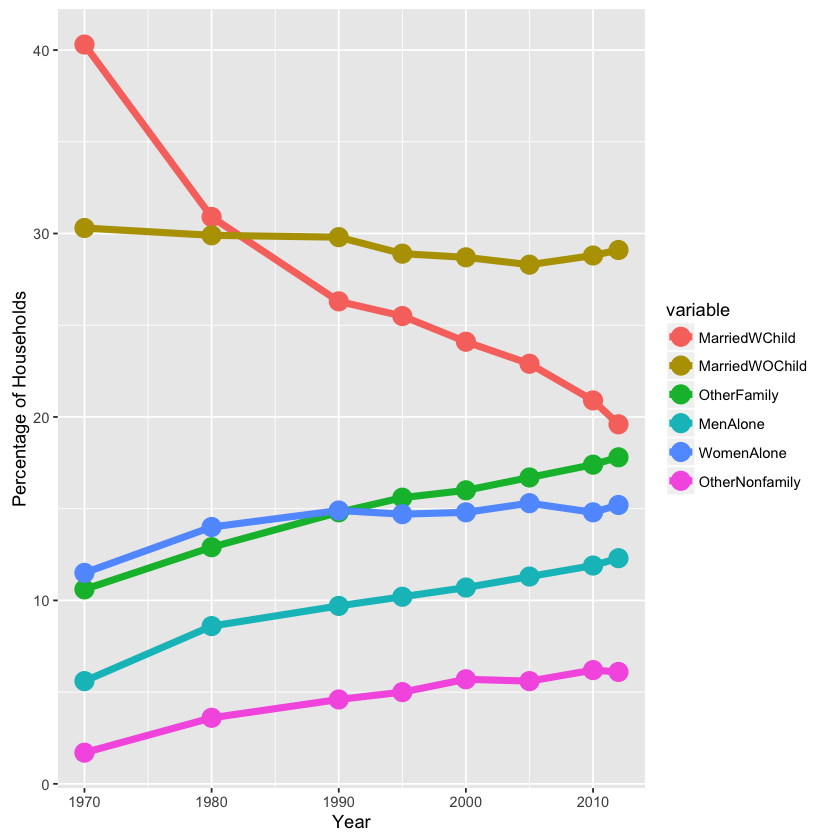

In [34]:
ggplot(melt(households, id="Year"),
       aes(x=Year, y=value, color=variable)) + 
    geom_line(size=2) + 
    geom_point(size=5) + 
    ylab("Percentage of Households")